In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [12]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

def import_npz_compensation(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName+'_compensation'] = Data[varName]

data_static_spectrum = np.load('../../data/flopping_spin/static_spectrum_wq=0.6.npz')
ref_static = data_static_spectrum['evals']

data_spectrum = np.load('../../data/flopping_spin/floquet_spectrum/w_r=0.7_N_rep=5_n_states=4_dim=4.npz', allow_pickle=True)
evals = data_spectrum['evals_list'][0]
Alist_spectrum = data_spectrum['A_list_replica']
color_m = data_spectrum['color_m']
w_r = data_spectrum['w_r']

final_t = 0.5

import_npz('../../data/flopping_spin/SNR_params_and_analytics_N_rep=15_n_states=4_dim=4_num_w=101_final_t='+str(final_t)+'_compensation=False.npz')
import_npz('../../data/flopping_spin/SNR_N_fock=6_N_rep_import=15_n_states=4_dim=4_num_w=101_final_t='+str(final_t)+'_compensation=False.npz')

import_npz('../../data/flopping_spin/single_case/A_q=0.2_w_d=1.4_w_d_disp=1.4_N_fock=20_N_rep=5_n_states=4_dim=4_compensation=False_dispersive=False.npz')
import_npz_compensation('../../data/flopping_spin/single_case/A_q=0.2_w_d=1.4_w_d_disp=1.4_N_fock=20_N_rep=5_n_states=4_dim=4_compensation=True_dispersive=False.npz')

In [13]:
def get_color(colorRGBA1, colorRGBA2):
    alpha = 1 - ((1 - colorRGBA1[3]) * (1 - colorRGBA2[3]) / 255)
    red   = (colorRGBA1[0] * (1 - colorRGBA2[3]) + colorRGBA2[0] * colorRGBA2[3]) / 1
    green = (colorRGBA1[1] * (1 - colorRGBA2[3]) + colorRGBA2[1] * colorRGBA2[3]) / 1
    blue  = (colorRGBA1[2] * (1 - colorRGBA2[3]) + colorRGBA2[2] * colorRGBA2[3]) / 1
    return (np.round(red,3), np.round(green,3), np.round(blue,3), np.round(alpha,3))

from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list(name='rbb',
	colors=['dodgerblue','white','tab:red'])

def colorFromBivariateData1(Z1,Z2,cmap1 = cmap):
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    cmap_1 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap1)
    cmap_1.set_array([])
    
    Z1_color = np.array(cmap_1.to_rgba(Z1))
    
    Z1_color[3] = np.round(Z1_color[3]*(1-Z2),3)
    
    return Z1_color

from matplotlib.colors import ListedColormap

my_cmap=LinearSegmentedColormap.from_list(name='rbb2',
	colors=['purple','#2ab07f','gold'])

def colorFromBivariateData2(Z1,Z2,cmap2 = my_cmap):    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    cmap_2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap2)
    cmap_2.set_array([])
    
    Z2_color = np.array(cmap_2.to_rgba(Z1))
        
    Z2_color[3] = np.round(Z2_color[3]*Z2,3)
    
    return Z2_color

In [14]:
xx = np.linspace(0,100,num=80)/100
yy = np.linspace(0,100,num=80)/100

z_m = np.zeros((len(xx),len(yy)), dtype=object)

for i,elem_x in enumerate(xx):
    for j,elem_y in enumerate(yy):
            z_m[i,j]=get_color(colorFromBivariateData1(elem_x,elem_y),colorFromBivariateData2(elem_x,elem_y))

/tmp/ipykernel_25978/204265235.py:257: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_25978/204265235.py:257: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


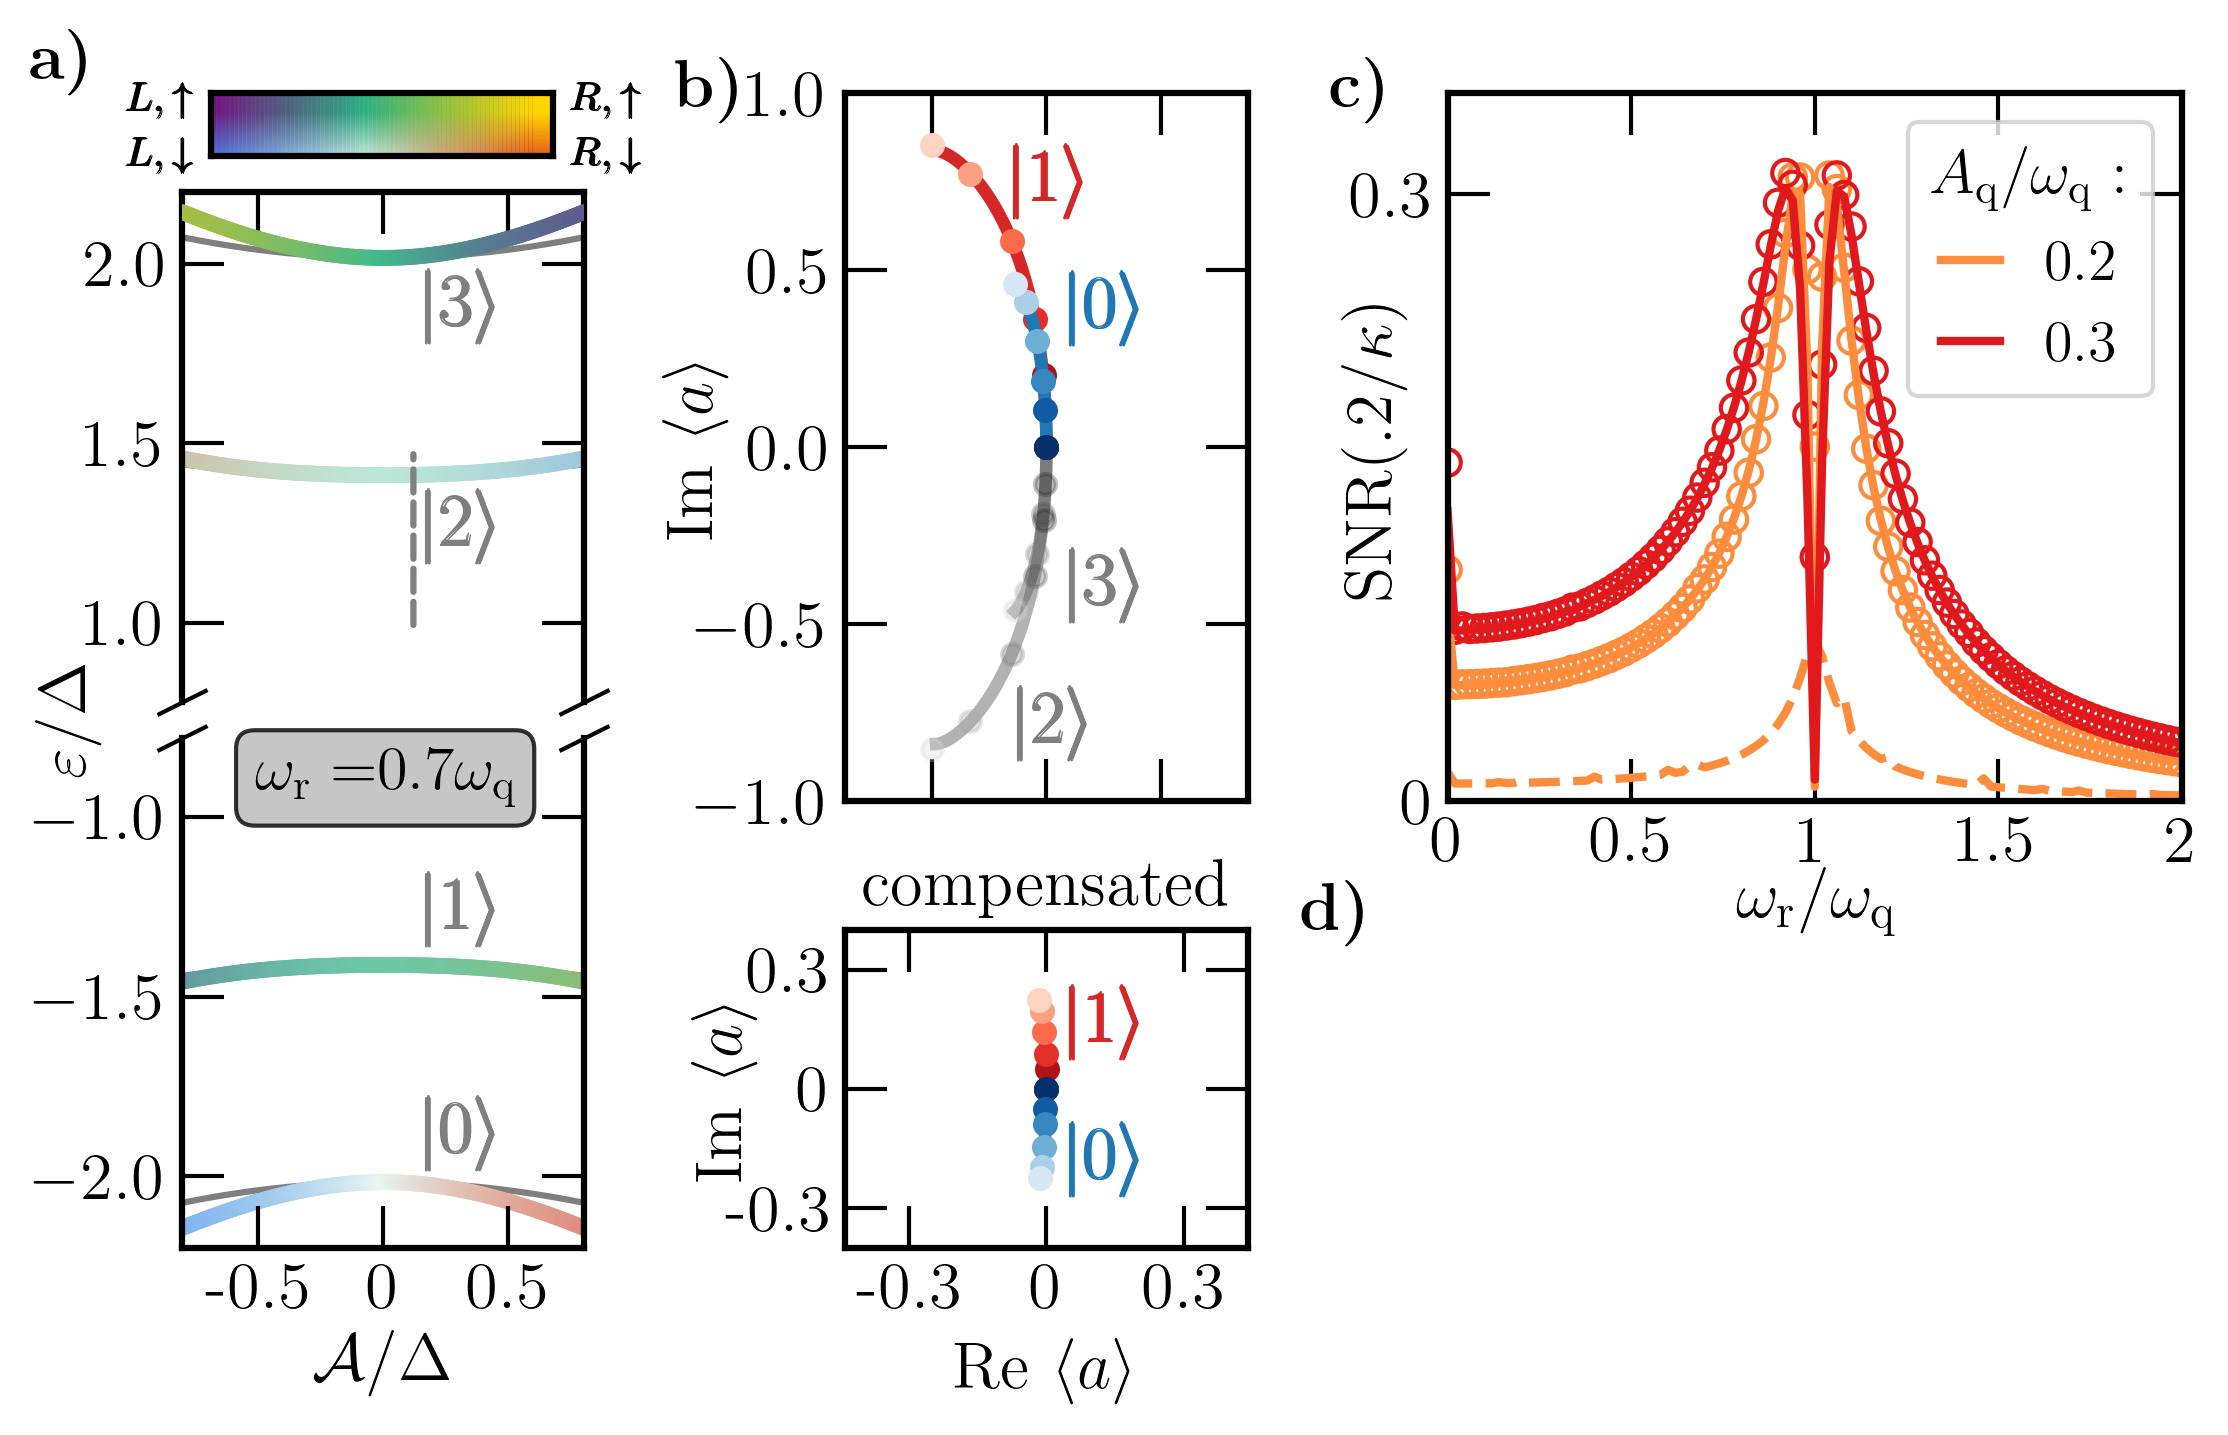

In [15]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors_plot = cmap_plot(norm([i for i in range(len(Alist))]))

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(8.6,5), layout="constrained", dpi=300)

plt.rcParams.update({'font.size': 18})

gs0 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.3, 1], wspace=0.3)

gs00 = gs0[0,0].subgridspec(3, 3, width_ratios=[0.015, 1, 0.02], height_ratios=[0.11,0.9,0.9], hspace=0.1, wspace=0.2)

ax1 = fig.add_subplot(gs00[1, 0:3])
ax12 = fig.add_subplot(gs00[2, 0:3])
ax = [ax1, ax12]

ax3 = fig.add_subplot(gs00[0, 1:2])

gs01 = gs0[0,1].subgridspec(2, 2, height_ratios=[1,0.45], width_ratios=[0.55, 1], wspace=0.35, hspace=0.25)

ax5 = fig.add_subplot(gs01[1, 0])
axins1 = fig.add_subplot(gs01[1, 1])
ax4 = fig.add_subplot(gs01[0, 0])

axx = [ax4]
ax_SNR = fig.add_subplot(gs01[0, 1])

#################### Floquet spectrum ##########################
for i in range(4):
    ax[0].plot(Alist_spectrum, ref_static[:,i], c='black', zorder=0, alpha=0.5)
    ax[0].scatter(Alist_spectrum, evals[:,i], s=8, c=color_m[i,:], zorder=i)
    ax[1].plot(Alist_spectrum, ref_static[:,i], c='black', zorder=0, alpha=0.5)
    ax[1].scatter(Alist_spectrum, evals[:,i], s=8, c=color_m[i,:], zorder=i)
        
for i in range(2):
    ax[i].xaxis.set_tick_params(direction="in", which='both')
    ax[i].yaxis.set_tick_params(direction="in", which='both')

ax[0].set_ylim([0.78,2.2])
ax[1].set_ylim([-2.2,-0.78])

ax[0].tick_params(top=True, bottom=False, left=True, right=True, labelleft=True,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

ax[1].tick_params(top=False, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax[1].set_ylabel(r'$\varepsilon/\Delta$', labelpad=0)
ax[1].set_xlabel(r'$\mathcal{A}/\Delta$', labelpad=2)

ax[0].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 1], [1, 1], transform=ax[1].transAxes, **kwargs)

ax[1].set_xticks([-0.5,0,0.5], ['-0.5','0','0.5'])

from matplotlib import patches
from matplotlib.patches import ConnectionPatch

arrow = patches.ConnectionPatch(
    xyA=(A_q, ax[0].get_position().y1+0.18),
    xyB=(A_q, ax[1].get_position().y0-0.1),
    coordsA=ax[0].transData,
    coordsB=ax[1].transData,
    # Default shrink parameter is 0 so can be omitted
    color="grey",
    mutation_scale=30,  # controls arrow head size
    linewidth=1.5,
    linestyle='dashed'
)
fig.patches.append(arrow)

for i,elem_x in enumerate(xx):
    for j,elem_y in enumerate(yy):
            ax3.scatter(elem_x, elem_y, facecolors=z_m[i,j], s=75, marker='s', edgecolors=z_m[i,j], antialiased=True)
ax3.set_rasterization_zorder(0)
ax3.set_aspect('auto')

ax3.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

###### Single case #######################################
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

cmap_black = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['gray'])
cmap_black.set_array([])

dictionary = {}

for q_idx, qubit_state in enumerate([0,1,2,3]):
    for index,i in enumerate(x_list):
        idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]

        if q_idx == 0:
            point_blue = axx[0].scatter(exp_a[q_idx][idx].real, exp_a[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=25, zorder=10)
            dictionary[f'point_blue_{index}'] = point_blue
        elif q_idx == 1:
            point_red = axx[0].scatter(exp_a[q_idx][idx].real, exp_a[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=25, zorder=8)
            dictionary[f'point_red_{index}'] = point_red
        else:
            point_black = axx[0].scatter(exp_a[q_idx-2][idx].real, -exp_a[q_idx-2][idx].imag, color=cmap_black.to_rgba(index), s=25, zorder=7, alpha=0.3)
            dictionary[f'point_black_{index}'] = point_black

axx[0].plot(exp_a_an[0].real,exp_a_an[0].imag, lw=3, c=colors[0], alpha=1, zorder=9)
axx[0].plot(exp_a_an[1].real,exp_a_an[1].imag, lw=3, c=colors[3], alpha=1, zorder=6)
axx[0].plot(exp_a_an[0].real,-exp_a_an[0].imag, lw=3, c='black', alpha=0.3, zorder=5)
axx[0].plot(exp_a_an[1].real,-exp_a_an[1].imag, lw=3, c='black', alpha=0.3, zorder=4)

axx[0].set_ylim([-1,1])
axx[0].set_xlim([-0.44,0.44])

axx[0].set_ylabel(r'Im $\langle a \rangle$', labelpad=-8)

axx[0].xaxis.set_tick_params(direction="in", which='both')
axx[0].yaxis.set_tick_params(direction="in", which='both')

############### Inset ##################
ax5.xaxis.set_tick_params(direction="in", which='both')
ax5.yaxis.set_tick_params(direction="in", which='both')

ax5.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax5.set_ylim([-0.4,0.4])
ax5.set_xlim([-0.44,0.44])

ax5.set_xticks([-0.3,0,0.3], ['-0.3','0','0.3'])
ax5.set_yticks([-0.3,0,0.3], ['-0.3','0','0.3'])
ax5.set_xlabel(r'Re $\langle a \rangle$')

for q_idx,qubit_state in enumerate([0,1]):
    for index,i in enumerate(x_list):
        idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]

        if q_idx == 0:
            point_blue = ax5.scatter(exp_a_compensation[q_idx][idx].real, exp_a_compensation[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=25, zorder=10)
            dictionary[f'point_blue_{index}'] = point_blue
        elif q_idx == 1:
            point_red = ax5.scatter(exp_a_compensation[q_idx][idx].real, exp_a_compensation[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=25, zorder=9)
            dictionary[f'point_red_{index}'] = point_red

ax5.plot(exp_a_an_compensation[0].real,exp_a_an_compensation[0].imag, lw=3, c=colors[0], alpha=1, zorder=8)
ax5.plot(exp_a_an_compensation[1].real,exp_a_an_compensation[1].imag, lw=3, c=colors[3], alpha=1, zorder=7)

ax5.set_ylabel(r'Im $\langle a \rangle$', labelpad=-8)

ax5.xaxis.set_tick_params(direction="in", which='both')
ax5.yaxis.set_tick_params(direction="in", which='both')

axx[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

ax5.set_title('compensated', fontsize=16)

########### SNR ##########################################################
for idx,A in enumerate(Alist):
    if idx==0 or idx==1:
        p1, = ax_SNR.plot(wlist/wq, np.real(res_an[idx,:]), label=str(np.round(A/wq,2)), color=colors_plot[idx], lw=2)    
        if idx == 0:
            q1, = ax_SNR.plot(wlist/wq, np.real(res_num_disp[idx,:]), color=colors_plot[idx], lw=2, ls='--')    
        ax_SNR.scatter(wlist/wq, np.real(res_num[idx,:]), marker='o', color=colors_plot[idx], facecolors='none', s=40)    

if final_t == 0.2:
    ax_SNR.set_ylim([0,0.125])
    ax_SNR.set_yticks([0,0.1], ['0','0.1'])
if final_t == 0.5:
    ax_SNR.set_ylim([0,0.35])
    ax_SNR.set_yticks([0,0.3], ['0','0.3'])

ax_SNR.xaxis.set_tick_params(direction="in", which='both')
ax_SNR.yaxis.set_tick_params(direction="in", which='both')
ax_SNR.set_xlabel(r'$\omega_{\text{r}}/\omega_{\text{q}}$', labelpad=-2)

ax_SNR.set_ylabel(r'$\text{SNR}(.2/\kappa)$', labelpad=-14)
ax_SNR.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_SNR.set_xticks([0,0.5,1,1.5,2], ['0','0.5','1','1.5','2'])

h, l = ax_SNR.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]] # Canvas
handles = h
labels = l  # Merging labels
leg = ax_SNR.legend(handles, labels, loc='upper right', handlelength=1, fontsize="14")
leg.set_title(r'$A_{\rm q}/\omega_{\rm q}:$', prop={'size':15})

############# Inset ###############################
axins1.xaxis.set_tick_params(direction="in", which='both')
axins1.yaxis.set_tick_params(direction="in", which='both')

axins1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

axins1.axis('off')

############### Labels ##########################
labels = ['a)','b)','c)','d)']
ax[0].text(-0.38, 1.22, r'\bf{'+labels[0]+'}', size=16, color='black', transform=ax[0].transAxes)
axx[0].text(-0.42, 0.98, r'\bf{'+labels[1]+'}', size=16, color='black', transform=axx[0].transAxes)
ax_SNR.text(-0.16, 0.98, r'\bf{'+labels[2]+'}', size=16, color='black', transform=ax_SNR.transAxes)
axins1.text(-0.2, 1, r'\bf{'+labels[3]+'}', size=16, color='black', transform=axins1.transAxes)

ax3.text(-0.05,1.2,r'$\pmb{L,\uparrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(1.26,1.2,r'$\pmb{R,\uparrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(-0.05,0.32,r'$\pmb{L,\downarrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(1.26,0.32,r'$\pmb{R,\downarrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)

ax[1].text(0.82,0.74,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)
ax[1].text(0.82,0.3,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)
ax[0].text(0.82,0.42,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)
ax[0].text(0.82,0.85,r'$\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)

axx[0].text(0.77,0.75,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=axx[0].transAxes, color = 'tab:blue')
axx[0].text(0.63,0.93,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=axx[0].transAxes, color = 'tab:red')
axx[0].text(0.64,0.165,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=axx[0].transAxes, color = 'black', alpha=0.5)
axx[0].text(0.77,0.36,r'$\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=axx[0].transAxes, color = 'black', alpha=0.5)

ax5.text(0.77,0.4,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax5.transAxes, color = 'tab:blue')
ax5.text(0.77,0.83,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax5.transAxes, color = 'tab:red')

ax[1].text(0.83, 0.9, r'$\omega_{\text{r}}=$'+str(np.round(w_r/wq,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax[1].transAxes, size=15)

ax[1].yaxis.set_label_coords(-0.2, 1.038)

plt.tight_layout()

fig.savefig('../figures/fig3_'+str(final_t)+'.pdf', bbox_inches='tight')